In [ ]:
!pip install git+https://github.com/Shafi2016/pymodeltime.git


In [1]:
!unzip /content/pymodeltime.zip -d /content/

Archive:  /content/pymodeltime.zip
   creating: /content/pymodeltime/
   creating: /content/pymodeltime/.git/
 extracting: /content/pymodeltime/.git/COMMIT_EDITMSG  
  inflating: /content/pymodeltime/.git/config  
  inflating: /content/pymodeltime/.git/description  
  inflating: /content/pymodeltime/.git/FETCH_HEAD  
 extracting: /content/pymodeltime/.git/HEAD  
   creating: /content/pymodeltime/.git/hooks/
  inflating: /content/pymodeltime/.git/hooks/applypatch-msg.sample  
  inflating: /content/pymodeltime/.git/hooks/commit-msg.sample  
  inflating: /content/pymodeltime/.git/hooks/fsmonitor-watchman.sample  
  inflating: /content/pymodeltime/.git/hooks/post-update.sample  
  inflating: /content/pymodeltime/.git/hooks/pre-applypatch.sample  
  inflating: /content/pymodeltime/.git/hooks/pre-commit.sample  
  inflating: /content/pymodeltime/.git/hooks/pre-merge-commit.sample  
  inflating: /content/pymodeltime/.git/hooks/pre-push.sample  
  inflating: /content/pymodeltime/.git/hooks/pre

In [3]:
# !pip install --upgrade git+https://github.com/Shafi2016/pymodeltime.git


In [2]:
%cd /content/pymodeltime/
!pip install .


/content/pymodeltime
Processing /content/pymodeltime
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 51.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.7/759.7 kB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━

In [1]:
!pip show pymodeltime

Name: pymodeltime
Version: 0.1
Summary: 
Home-page: 
Author: Shafiullah Qureshi
Author-email: qureshi.shafiullah@gmail.com
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: h2o, pandas, pmdarima, prophet, pystan, pytimetk, scikit-learn, statsmodels, xgboost
Required-by: 


In [4]:
import pandas as pd
import pytimetk as tk
from sklearn.model_selection import train_test_split

In [5]:
# Load data
data = pd.read_csv('/content/m_qdata.csv')
data['date'] = pd.to_datetime(data['date'])
data.head(3)

,date,GDP,GDPM,EMP_CONS_CAN,TOT_HRS_CAN,NDM_new,IP_new,MANU_TOT_INV_new,RT_new,IMP_TRANSP_BP_new,EMP_SALES_CAN
0,1981-04-01,0.011177,0.006170,0.011605,0.004021,0.010748,0.010193,0.036455,0.001205,0.080797,0.000057
1,1981-07-01,-0.009018,-0.009057,0.002623,-0.001366,-0.033847,-0.017778,0.035141,-0.008642,0.028632,0.008603
2,1981-10-01,-0.004589,-0.000361,-0.011007,-0.008744,-0.024493,-0.024728,0.029451,-0.027613,-0.123275,0.009392


In [6]:
# Get the maximum (last) date in your dataset
max_date = data['date'].max()

# Create a DataFrame with only the last date
last_date_df = pd.DataFrame({'date': [max_date]})

# Extend this DataFrame with 6 future dates
future_dates = last_date_df.future_frame(
    date_column='date',
    length_out=6,  # Number of future periods to forecast
    freq='Q',
    bind_data=False # Do not combine the original data
)
# Append these future dates to your original data
extended_data = pd.concat([data, future_dates]).reset_index(drop=True)

# Specify value columns for which you want to create lags
all_columns = data.columns.tolist()
excluded_columns = ['date','GDP']  # Add any other columns you want to exclude
value_columns = [col for col in all_columns if col not in excluded_columns]


# Create lagged columns for the extended data
lagged_data = extended_data.augment_lags(
    date_column='date',
    value_column= value_columns ,
    lags=6,  # Creating a 6-period lag
    engine='pandas'
)

# Drop the original value columns
lagged_data.drop(value_columns, axis=1, inplace=True)

lagged_data.to_csv("./data_with_future_and_lags.csv", index = False)

In [7]:
# Drop all rows with any NaN values in lagged_data
full_data = lagged_data.dropna()

# Save the resulting DataFrame to a CSV file
full_data.to_csv("./full_data.csv", index=False)

# Specify value columns for which you want to create lags
all_columns_2 = full_data.columns.tolist()
excluded_columns = ['date','GDP']  # Add any other columns you want to exclude
columns_to_convert = [col for col in all_columns_2 if col not in excluded_columns]


full_data [columns_to_convert] = full_data [columns_to_convert].astype('float32')
train_data, test_data = train_test_split(full_data, test_size=0.2, shuffle=False)

# Drop all rows with any NaN values in train_data and test_data
train_data = train_data.dropna()
test_data = test_data.dropna()

# Ensure the date column is in datetime format
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [8]:
lagged_columns = [
    'GDPM_lag_6', 'EMP_CONS_CAN_lag_6', 'TOT_HRS_CAN_lag_6',
    'NDM_new_lag_6', 'IP_new_lag_6', 'MANU_TOT_INV_new_lag_6',
    'RT_new_lag_6', 'IMP_TRANSP_BP_new_lag_6', 'EMP_SALES_CAN_lag_6'
]

# Check that all lagged columns are not NaN
non_nan_conditions = [lagged_data[col].notna() for col in lagged_columns]
combined_condition = pd.concat(non_nan_conditions, axis=1).all(axis=1)

# Filter rows where 'value' is NaN but lagged columns are not NaN
future_data = lagged_data[lagged_data['GDP'].isna() & combined_condition]
future_data[columns_to_convert] = future_data[columns_to_convert].astype('float32')



In [9]:
train_data.head(3)

,date,GDP,GDPM_lag_6,EMP_CONS_CAN_lag_6,TOT_HRS_CAN_lag_6,NDM_new_lag_6,IP_new_lag_6,MANU_TOT_INV_new_lag_6,RT_new_lag_6,IMP_TRANSP_BP_new_lag_6,EMP_SALES_CAN_lag_6
6,1982-10-01,-0.009270,0.006172,0.011604,0.004021,0.010750,0.010193,0.036469,0.001205,0.080811,0.000057
7,1983-01-01,0.016586,-0.009056,0.002623,-0.001366,-0.033844,-0.017776,0.035156,-0.008644,0.028625,0.008606
8,1983-04-01,0.019470,-0.000361,-0.011009,-0.008743,-0.024490,-0.024734,0.029449,-0.027618,-0.123291,0.009392


In [10]:
test_data.head(3)

,date,GDP,GDPM_lag_6,EMP_CONS_CAN_lag_6,TOT_HRS_CAN_lag_6,NDM_new_lag_6,IP_new_lag_6,MANU_TOT_INV_new_lag_6,RT_new_lag_6,IMP_TRANSP_BP_new_lag_6,EMP_SALES_CAN_lag_6
130,2013-10-01,0.010452,0.005360,0.014954,0.007828,-0.005383,0.000440,0.009277,-0.002390,0.034393,0.002655
131,2014-01-01,0.001633,0.001907,0.001413,0.003014,-0.002430,-0.015671,0.005211,0.004482,-0.027817,-0.004276
132,2014-04-01,0.009094,0.002270,0.001864,-0.000572,-0.005245,-0.000548,0.003248,0.009583,-0.028305,0.009865


In [11]:
future_data.head()

,date,GDP,GDPM_lag_6,EMP_CONS_CAN_lag_6,TOT_HRS_CAN_lag_6,NDM_new_lag_6,IP_new_lag_6,MANU_TOT_INV_new_lag_6,RT_new_lag_6,IMP_TRANSP_BP_new_lag_6,EMP_SALES_CAN_lag_6
162,2021-12-31,NaN,-0.115417,-0.178589,-0.194702,-0.115845,-0.134033,-0.019272,-0.122375,-1.026367,-0.141846
163,2022-03-31,NaN,0.084290,0.089661,0.156128,0.100037,0.074707,-0.011368,0.165527,1.010742,0.117554
164,2022-06-30,NaN,0.020035,0.016296,0.036652,0.027435,0.028366,0.007206,0.026596,0.016296,0.022964
165,2022-09-30,NaN,0.012665,0.041565,0.026901,-0.010002,0.017288,0.021072,0.012741,-0.056763,-0.017380
166,2022-12-31,NaN,-0.002768,-0.008064,-0.009727,-0.001701,-0.005859,0.022888,-0.025757,-0.164673,0.008980


In [12]:
# Define the target column
target_column = 'GDP'

# Select feature columns - all columns except 'date', 'value', and 'id'
feature_columns = [col for col in train_data.columns if col not in ['date', target_column, 'id']]

# Extract features (X) and target (y) from the training data
X_train = train_data[feature_columns]
y_train = train_data[target_column]

# Display the first few rows of X_train to verify
print(X_train.head())


    GDPM_lag_6  EMP_CONS_CAN_lag_6  TOT_HRS_CAN_lag_6  NDM_new_lag_6  \
6     0.006172            0.011604           0.004021       0.010750   
7    -0.009056            0.002623          -0.001366      -0.033844   
8    -0.000361           -0.011009          -0.008743      -0.024490   
9    -0.007881           -0.032501          -0.013840      -0.026245   
10   -0.013107           -0.043640          -0.020737      -0.031189   

    IP_new_lag_6  MANU_TOT_INV_new_lag_6  RT_new_lag_6  \
6       0.010193                0.036469      0.001205   
7      -0.017776                0.035156     -0.008644   
8      -0.024734                0.029449     -0.027618   
9      -0.014992                0.031219     -0.021988   
10     -0.036621               -0.006004     -0.035156   

    IMP_TRANSP_BP_new_lag_6  EMP_SALES_CAN_lag_6  
6                  0.080811             0.000057  
7                  0.028625             0.008606  
8                 -0.123291             0.009392  
9             

In [2]:
from pymodeltime import ModelTimeTable

In [13]:
from pymodeltime import ArimaReg, ProphetReg,MLModelWrapper

from pymodeltime import ModelTimeTable, ModelTimeAccuracy, ModelTimeCalibration, ModelTimeForecast


In [14]:
from pymodeltime import ArimaReg, ProphetReg
from pymodeltime import ModelTimeTable, ModelTimeAccuracy, ModelTimeCalibration, ModelTimeForecast,ModelTimeRefit
from pymodeltime import ArimaReg, ProphetReg
from pymodeltime import MLModelWrapper,H2OAutoMLWrapper

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [15]:
# Create instances of the ML models
rf_model = RandomForestRegressor()
ml_rf_wrapper = MLModelWrapper(rf_model, feature_columns, "Random Forest")

xgb_model = XGBRegressor()
ml_xgb_wrapper = MLModelWrapper(xgb_model, feature_columns, "XGBoost")

# Fit the models (assuming train_data and y_train are defined)
ml_rf_wrapper.fit(train_data, y_train)
ml_xgb_wrapper.fit(train_data, y_train)

In [16]:
from sklearn.model_selection import GridSearchCV

def tune_rf_model(X, y, param_grid, cv=5):
    rf_model = RandomForestRegressor()
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_estimator_

def tune_xgb_model(X, y, param_grid, cv=5):
    xgb_model = XGBRegressor()
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_estimator_


rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}


# Assuming train_data and y_train are defined
# Extract features and target
X_train = train_data[feature_columns]
y_train = train_data[target_column]

# Tune and fit Random Forest
fine_tuned_rf = tune_rf_model(X_train, y_train, rf_param_grid)
ml_rf_wrapper = MLModelWrapper(fine_tuned_rf, feature_columns, "Random Forest")
ml_rf_wrapper.fit(X_train, y_train)

# Tune and fit XGBoost
fine_tuned_xgb = tune_xgb_model(X_train, y_train, xgb_param_grid)
ml_xgb_wrapper = MLModelWrapper(fine_tuned_xgb, feature_columns, "XGBoost")
ml_xgb_wrapper.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [17]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Convert to H2OFrame and train
h2o_train = h2o.H2OFrame(train_data)
automl = H2OAutoML(max_models=10, seed=1, max_runtime_secs=300)
automl.train(x=feature_columns, y='GDP', training_frame=h2o_train)

# Extract the leaderboard
lb = automl.leaderboard

# Optionally, you can convert the leaderboard to a pandas DataFrame for easier manipulation
lb_df = lb.as_data_frame()

# Display the leaderboard
print(lb_df.head())

# Get the best model
best_h2o_model = automl.leader


# Example of model initialization
h2o_automl_wrapper = H2OAutoMLWrapper(best_h2o_model, target_column='GDP')



Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp475hr0gz
  JVM stdout: /tmp/tmp475hr0gz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp475hr0gz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_hbiwsj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
00:41:45.286: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 124.0.

█████████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
                                            model_id      rmse       mse  \
0  StackedEnsemble_AllModels_1_AutoML_1_20231224_...  0.007189  0.000052   
1                      GLM_1_AutoML_1_20231224_04139  0.007201  0.000052   
2                      GBM_2_AutoML_1_20231224_04139  0.007245  0.000052   
3                      GBM_5_AutoML_1_20231224_04139  0.007247  0.000053   
4  StackedEnsemble_BestOfFamily_1_AutoML_1_202312...  0.007255  0.000053   

        mae     rmsle  mean_residual_deviance  
0  0.005415  0.007166                0.000052  
1  0.00

H2O_cluster_uptime:,38 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_hbiwsj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.168 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [18]:

prophet_model_multi  = ProphetReg(seasonality_yearly=True, seasonality_weekly=True,
                               seasonality_daily=False, changepoint_range=0.5, prior_scale_seasonality=5.0,
                               season='multiplicative',interval_width=0.95 )


prophet_model_multi.fit(train_data,
                        target_column='GDP',
                        date_column='date',
                        regressors= feature_columns)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpci44432w/62dknm7k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpci44432w/0hllrcot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=720', 'data', 'file=/tmp/tmpci44432w/62dknm7k.json', 'init=/tmp/tmpci44432w/0hllrcot.json', 'output', 'file=/tmp/tmpci44432w/prophet_modelmur_ips4/prophet_model-20231224004212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:42:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:42:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
# Add it to ModelTimeTable
modeltime_table = ModelTimeTable(h2o_automl_wrapper,prophet_model_multi)




In [20]:

from pymodeltime import  ModelTimeCalibration

model_time_calibrator = ModelTimeCalibration(modeltime_table, test_data, target_column = 'GDP')
model_time_calibrator.calibrate()
calibration_results_df = model_time_calibrator.get_calibration_results()
print(calibration_results_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
   .model_id    .model .model_desc   .type  .calibration_data
0          1  <fit[+]>  H2O AutoML  Custom  <tibble [32 × 4]>
1          2  <fit[+]>     PROPHET  Custom  <tibble [32 × 4]>


In [21]:


# Initialize and fit the ARIMA model
arima_reg_model_multi = ArimaReg(
    non_seasonal_ar=1,
    non_seasonal_differences=0,
    non_seasonal_ma=1,
    seasonal_ar=0,
    seasonal_differences=1,
    seasonal_ma=1,
    seasonal_period=12,trend= 't',uses_date=True
) # (no trend), 'c' (constant), 't' (linear trend), or 'ct' (constant and linear trend).


arima_reg_model_multi.fit(train_data,
                          target_column='GDP',
                          date_column='date',
                          regressors= feature_columns)

prophet_model_multi  = ProphetReg(seasonality_yearly=True, seasonality_weekly=True,
                               seasonality_daily=False, changepoint_range=0.5, prior_scale_seasonality=5.0,
                               season='multiplicative',interval_width=0.95 )


prophet_model_multi.fit(train_data,
                        target_column='GDP',
                        date_column='date',
                        regressors= feature_columns)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpci44432w/enlvacwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpci44432w/amvbzovm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86835', 'data', 'file=/tmp/tmpci44432w/enlvacwe.json', 'init=/tmp/tmpci44432w/amvbzovm.json', 'output', 'file=/tmp/tmpci44432w/prophet_modelwojzqw84/prophet_model-20231224004221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:42:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:42:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:


modeltime_table = ModelTimeTable(ml_xgb_wrapper,ml_rf_wrapper,arima_reg_model_multi,prophet_model_multi,h2o_automl_wrapper)
model_time_calibrator = ModelTimeCalibration(modeltime_table, test_data,target_column = 'GDP')
model_time_calibrator.calibrate()
calibration_results_df = model_time_calibrator.get_calibration_results()
print(calibration_results_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
   .model_id    .model              .model_desc     .type  .calibration_data
0          1  <fit[+]>                  XGBoost  ML Model  <tibble [32 × 4]>
1          2  <fit[+]>            Random Forest  ML Model  <tibble [32 × 4]>
2          3  <fit[+]>  ARIMA(1,0,1)(0,1,1)[12]    Custom  <tibble [32 × 4]>
3          4  <fit[+]>                  PROPHET    Custom  <tibble [32 × 4]>
4          5  <fit[+]>               H2O AutoML    Custom  <tibble [32 × 4]>


In [23]:
# Example usage
target_column = 'GDP'  # Replace with your actual target column name
modeltime_accuracy = ModelTimeAccuracy(modeltime_table, test_data, target_column)
accuracy_results = modeltime_accuracy.calculate_accuracy()
print(accuracy_results)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
   model_id               model_desc       mae      rmse        r2
0         1                  XGBoost  0.011856  0.026667  0.019043
1         2            Random Forest  0.011907  0.026781  0.010671
2         3  ARIMA(1,0,1)(0,1,1)[12]  0.012628  0.026517  0.030084
3         4                  PROPHET  0.012252  0.026887  0.002761
4         5               H2O AutoML  0.011547  0.027095 -0.012676


In [24]:

# Initialize the refitter
refitter = ModelTimeRefit(modeltime_table, verbose=True, parallel=True, max_workers=4)

# Refit the models with the new data
new_data = pd.concat([train_data, test_data], ignore_index=True)  # Replace with your entire dataset (train + test)


# Convert only the numeric columns to float32
new_data[feature_columns] = new_data[feature_columns].astype('float32')

target_column = 'GDP'  # Specify the target column from your dataset
refitted_models = refitter.refit_models(new_data, target_column)

# Generate forecasts using the refitted models
forecast_results_refit = refitter.forecast(new_data, target_column)

# Concatenate all model forecasts into a single DataFrame
all_forecasts = pd.concat([result for result in forecast_results_refit.values() if result is not None], ignore_index=True)

# Save to CSV
all_forecasts.to_csv("./forecast_results_refit.csv", index=False)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpci44432w/go0ydggk.json


Model successfully refitted: <pymodeltime.pymodeltime.MLModelWrapper.MLModelWrapper object at 0x77fd83f33a90>
Checking whether there is an H2O instance running at http://localhost:54321.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpci44432w/fiq_0een.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77408', 'data', 'file=/tmp/tmpci44432w/go0ydggk.json', 'init=/tmp/tmpci44432w/fiq_0een.json', 'output', 'file=/tmp/tmpci44432w/prophet_modelg3y3aj37/prophet_model-20231224004224.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:42:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:42:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 connected.
Model successfully refitted: <pymodeltime.pymodeltime.ProphetReg.ProphetReg object at 0x77fd8412e1d0>


H2O_cluster_uptime:,51 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_hbiwsj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.168 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |Model successfully refitted: <pymodeltime.pymodeltime.MLModelWrapper.MLModelWrapper object at 0x77fd83f33ca0>
█Model successfully refitted: <pymodeltime.pymodeltime.ArimaReg.ArimaReg object at 0x77fd8412cc40>
█
00:42:34.418: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 156.0.

█████████████████████████████████████████████████████████████| (done) 100%
Model successfully refitted: <pymodeltime.pymodeltime.H2OAutoMLWrapper.H2OAutoMLWrapper object at 0x77fd7ff04910>
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [25]:
# Ensure this import statement is correct
from pymodeltime import ModelTimeTable
import h2o
# Import other necessary classes and functions

forecast_test = ModelTimeForecast(modeltime_table, new_data=test_data, actual_data=data,target_column= 'GDP')
forecast_results_test = forecast_test.forecast()
forecast_results_test.to_csv("forecast_results_test.csv", index=False)

Processing predictions for model: MLModelWrapper
Processing predictions for model: MLModelWrapper
Processing predictions for model: ArimaReg
Processing predictions for model: ProphetReg
Original columns before processing for Prophet: Index(['date', 'GDP', 'GDPM_lag_6', 'EMP_CONS_CAN_lag_6', 'TOT_HRS_CAN_lag_6',
       'NDM_new_lag_6', 'IP_new_lag_6', 'MANU_TOT_INV_new_lag_6',
       'RT_new_lag_6', 'IMP_TRANSP_BP_new_lag_6', 'EMP_SALES_CAN_lag_6'],
      dtype='object')
Columns after processing for Prophet: Index(['ds', 'GDP', 'GDPM_lag_6', 'EMP_CONS_CAN_lag_6', 'TOT_HRS_CAN_lag_6',
       'NDM_new_lag_6', 'IP_new_lag_6', 'MANU_TOT_INV_new_lag_6',
       'RT_new_lag_6', 'IMP_TRANSP_BP_new_lag_6', 'EMP_SALES_CAN_lag_6'],
      dtype='object')
Processing predictions for model: H2OAutoMLWrapper
Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_hbiwsj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


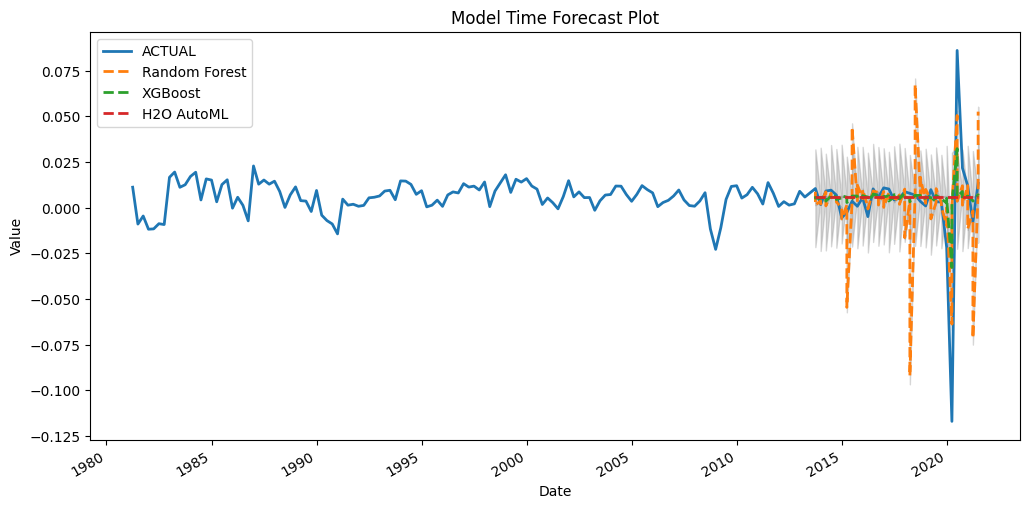

In [27]:
from pymodeltime import plot_modeltime_forecast

# forecast_results = <your forecast results DataFrame>
plot_modeltime_forecast(forecast_results_test, interactive=False)  # For static plot
plot_modeltime_forecast(forecast_results_test, interactive=True)   # For interactive plo